# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [1]:
import nltk
#from nltk.book import *

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [4]:
sentence1 = ["This", "is", "a", "sentence"]
print("the sentence length is", len(sentence1))
bigram = list(nltk.bigrams(sentence1))
bigram.sort()
print(bigram)

the sentence length is 4
[('This', 'is'), ('a', 'sentence'), ('is', 'a')]


Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [7]:
string2 = "This is a second sentence."
sentence2 = nltk.word_tokenize(string2)
print(sentence2)

['This', 'is', 'a', 'second', 'sentence', '.']


## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [8]:
from urllib import request
url = "https://www.gutenberg.org/files/2701/2701-0.txt"
response = request.urlopen(url)
book_str = response.read().decode('utf8')

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [18]:
# Nous avons repéré les premières et dernières phrases du livre, puis déterminé leur indice.
# Ensuite, nous avons utilisé ces indices pour extraire le texte du livre qui nous intéresse.
start_index = book_str.find("Call me Ishmael.")
end_index = book_str.rfind("*** END OF THE PROJECT GUTENBERG EBOOK MOBY-DICK; OR THE WHALE ***")

text_trimmed = book_str[start_index:end_index]
text_trimmed = text_trimmed.replace('\r', '')
text_trimmed = text_trimmed.replace('\n', ' ')
print("Lengh of the text is", len(text_trimmed))
print("First 100 characters ", text_trimmed[:100]) 

Lengh of the text is 1191768
First 100 characters  Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse,


Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [19]:
#text_trimmed = text_trimmed.replace(';', '.')
text_sentences = nltk.tokenize.sent_tokenize(text_trimmed, language='english')
print(text_sentences[:5])

['Call me Ishmael.', 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.', 'It is a way I have of driving off the spleen and regulating the circulation.', 'Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can.', 'This is my substitute for pistol and ball.']


Le texte semble bien segmenté, on voit que la fonction sent_tokenize repère bien une phrase lorsqu'elle se termine par un '.', '?', '!', etc. Dans notre cas, une phrase est séparée par plusieurs ';', la fonction ne sépare pas avec ce caractère et donc cela nous donne une très longue phrase, ce qui peut être résolu avec text_trimmed.replace(';', '.') si besoin.

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [13]:
import os

In [14]:
filename1 = "sent_tokenized_1.txt"
if os.path.exists(filename1): 
    os.remove(filename1)
with open(filename1, 'a', encoding='utf8') as fd:
    for sentence in text_sentences:
        fd.write("%s\n" % sentence)

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [20]:
text_words = list()
for sentence in text_sentences:
    text_words.append(nltk.tokenize.word_tokenize(sentence, language='english', preserve_line=False))
print(text_words[:5])

[['Call', 'me', 'Ishmael', '.'], ['Some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.'], ['It', 'is', 'a', 'way', 'I', 'have', 'of', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', '.'], ['Whenever', 'I', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth', ';', 'whenever', 'it', 'is', 'a', 'damp', ',', 'drizzly', 'November', 'in', 'my', 'soul', ';', 'whenever', 'I', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouses', ',', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every', 'funeral', 'I', 'meet', ';', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', ',', 'that', 'it', 'requires', 'a', 'strong'

Le texte semble tout à fait bien segmenté.

Calculez le nombre total de _tokens_ obtenus.

In [22]:
from functools import reduce

nb_tokens = reduce(lambda count, l: count + len(l), text_words, 0)
print("Nombre de token :", nb_tokens)

Nombre de token : 250394


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [23]:
filename2 = "tokens.txt"
if os.path.exists(filename2): 
    os.remove(filename2)
with open(filename2, 'a', encoding='utf8') as fd:
    for sentence in text_words:
        fd.write(' '.join(sentence) + '\n')

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [24]:
text_words_2 = nltk.tokenize.word_tokenize(text_trimmed, language='english', preserve_line=False)
print("Number of tokens:", len(text_words_2))
print(text_words_2[:100])

Number of tokens: 250394
['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', ',', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', ',', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', '.', 'It', 'is', 'a', 'way', 'I', 'have', 'of', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', '.', 'Whenever', 'I', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth', ';', 'whenever', 'it', 'is', 'a', 'damp', ',', 'drizzly', 'November', 'in', 'my', 'soul', ';', 'whenever', 'I', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouses', ',', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every']


Le nombre de token est le même qu'avec la variable précédente nb_tokens

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [25]:
# Please write your Python code in this cell and execute it.
text = nltk.Text(text_words_2)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [26]:
# Please write your Python code in this cell and execute it.
text.concordance("whale")

Displaying 25 of 1000 matches:
s the overwhelming idea of the great whale himself . Such a portentous and myst
deliverable , nameless perils of the whale ; these , with all the attending mar
st soul , endless processions of the whale , and , mid most of them all , one g
 place where the first dead American whale was stranded . Where else but from N
s alone visible ; and an exasperated whale , purposing to spring clean over the
 Javan seas , and run away with by a whale , years afterwards slain off the Cap
en—the bar—a rude attempt at a right whale ’ s head . Be that how it may , ther
e stands the vast arched bone of the whale ’ s jaw , so wide , a coach might al
at they made a straight wake for the whale ’ s mouth—the bar—when the wrinkled 
eboard representing a man striking a whale . Of things not properly belonging t
IZA Who were towed out of sight by a Whale , On the Off-shore Ground in the PAC
ws of his boat was killed by a Sperm Whale on the coast of Japan , _August_ 3_d
d joy— “ 

In [27]:
# Please write your Python code in this cell and execute it.
text.similar("whale")

ship boat sea time man captain world deck pequod whales crew air head
line other water moment side thing way


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [28]:
# Please write your Python code in this cell and execute it
nltk.download('stopwords')
text.collocation_list()[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('Sperm', 'Whale'),
 ('Moby', 'Dick'),
 ('White', 'Whale'),
 ('old', 'man'),
 ('Captain', 'Ahab'),
 ('sperm', 'whale'),
 ('Right', 'Whale'),
 ('New', 'Bedford'),
 ('Captain', 'Peleg'),
 ('Mr.', 'Starbuck')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [29]:
# Please write your Python code in this cell and execute it.
print("Total number of tokens: ", len(text_words_2))

# Convert token list to set 
unique_tokens = set(text_words_2)
print("Total number of unique tokens: ", len(unique_tokens))

#print the first 300 unique tokens sorted
print("First 300 unique tokens sorted: ")
sortedList = sorted(unique_tokens)
print(sortedList[:300])

# Words with more than 18 characters
long_words = [w for w in text_words_2 if len(w) > 18]
print("\n\n\nWords with more than 18 characters: ", long_words)

Total number of tokens:  250394
Total number of unique tokens:  21366
First 300 unique tokens sorted: 
['!', '$', '&', '(', ')', '*', ',', '-Westers', '-wester', '.', '.—A', '.—Another', '.—I', '.—In', '.—Of', '.—The', '.—This', '.—Though', '.—Under', '1', '10', '10,800', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '13,000', '130', '131', '132', '133', '134', '135', '14', '144,000', '1492', '15', '150,000', '15th', '16', '1671', '1695', '16th', '17', '1726', '1750', '1775', '1776', '1778', '1779', '1788', '1791', '1793', '18', '180', '1807', '1819', '1820', '1825', '1833', '1836', '1839', '1842', '1850', '1851', '19', '1ST', '1_st_', '2', '2,800', '20', '20,000', '20,000,000', '2000', '200th', '21', '21st', '22', '23', '24', '25', '25,000', '26', '27', '275th', '28', '29', '2ND', '3', '3._', '30', '31', '

**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [30]:
# Please write your Python code in this cell and execute it.
fdist = nltk.FreqDist(text_words_2)
print(fdist)

fdist.most_common(20)

<FreqDist with 21366 samples and 250394 outcomes>


[(',', 18924),
 ('the', 13478),
 ('.', 6731),
 ('of', 6412),
 ('and', 5899),
 ('to', 4433),
 ('a', 4414),
 (';', 4139),
 ('in', 3821),
 ('that', 2879),
 ('’', 2707),
 ('his', 2422),
 ('it', 2134),
 ('I', 2061),
 ('!', 1740),
 ('s', 1712),
 ('is', 1651),
 ('with', 1631),
 ('he', 1621),
 ('was', 1607)]

Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [31]:
# Please write your Python code in this cell and execute it.
seventyMostCommon = fdist.most_common(70)
atLeast4Chars = [w for w in seventyMostCommon if len(w[0]) > 4]
print(atLeast4Chars) 

[('whale', 738), ('there', 682), ('which', 614), ('their', 598)]


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

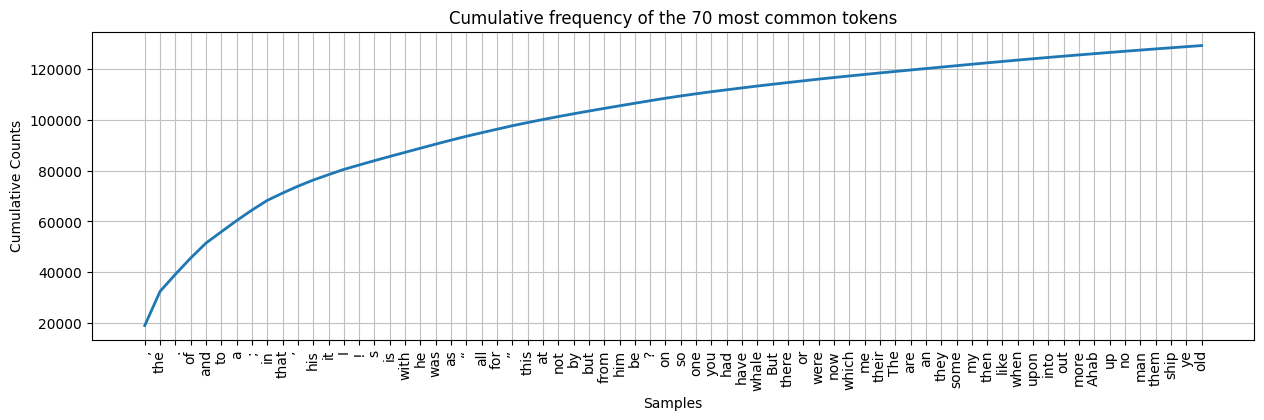

In [33]:
# Please write your Python code in this cell and execute it.
plt.figure(figsize=(15, 4))
ax = fdist.plot(70, cumulative=True, title="Cumulative frequency of the 70 most common tokens")

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

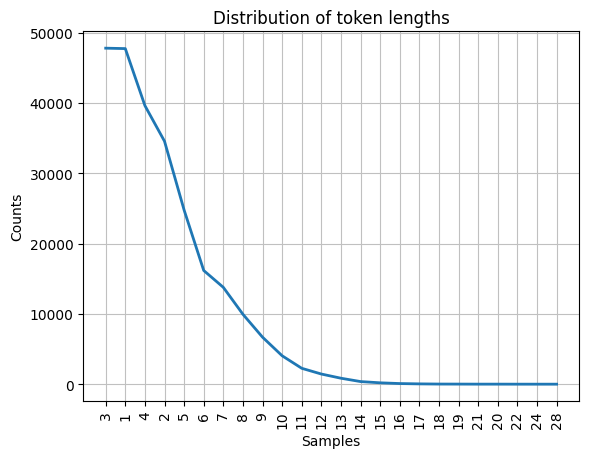

<AxesSubplot:title={'center':'Distribution of token lengths'}, xlabel='Samples', ylabel='Counts'>

In [34]:
# Please write your Python code in this cell and execute it.
tokenLengths = [len(w) for w in text_words_2]
tokenDist = nltk.FreqDist(tokenLengths)
tokenDist.plot(title = "Distribution of token lengths")

Les longueurs les plus fréquentes sont 3 et 1. On peut supposer que cela est du au token "the" et aux caractères spéciaux pour la ponctuation ('.', ',') On voit ensuite que plus la longueur du token augmente, plus son nombre d'occurence diminue jusqu'à devenir proche de zéro à partir d'une longueur de 15.

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 